In [1]:
import numpy as np
import matplotlib.pyplot as plt
from forward_utils import *
from backward_utils import *
from PSME_forward_algorithm import *
from PSME_backward_algorithm import *

#Solving the Coupled Periodic Sylvester Equation Using an Iterative Scheme

##Set Up the Coupled Periodic Sylvester Equation

###Coefficient matrices for states $j=0,1,2$

In [2]:
A_0 = np.array([[2.7,0.9],
                [-1.1,2.3]])

A_1 = np.array([[4.2,1.3],
                [-1.9,3.8]])

A_2 = np.array([[6.1,3.8],
                [-3.1,6.3]])

B_0 = np.array([[1.5,-0.2],
                [0.4,1]])

B_1 = np.array([[2.1,-0.4],
                [0.4,2]])

B_2 = np.array([[3.1,-0.6],
                [0.7,3.5]])

C_0 = np.array([[13.2,10.6],
                [0.6,8.4]])

C_1 = np.array([[26.3,21.2],
                [1.2,16.8]])

C_2 = np.array([[38.6,32.1],
                [1.6,24.2]])


A_coefs = [A_0,A_1,A_2]

B_coefs = [B_0,B_1,B_2]

C_coefs = [C_0,C_1,C_2]


###True Solutions $X_j$ for states $j=0,1,2$

In [3]:
X_0_true = np.array([[2.2793996,2.1443471],
                     [-0.0051931702, 2.8579759]])

X_1_true = np.array([[3.8959223, 3.0173185],
                     [0.91464058, 4.3687107]])

X_2_true = np.array([[3.7974097, 2.1833681],
                     [1.8075207, 3.3273581]])

X_true_vals = [X_0_true, X_1_true, X_2_true]

###Initialize Guesses for $X_j$'s

In [4]:
X_0_init = 10**(-16)*np.ones((2,2))

X_1_init = 10**(-16)*np.ones((2,2))

X_2_init = 10**(-16)*np.ones((2,2))

X_guesses = [X_0_init, X_1_init,X_2_init]

##Conduct the Iterative Algorithm

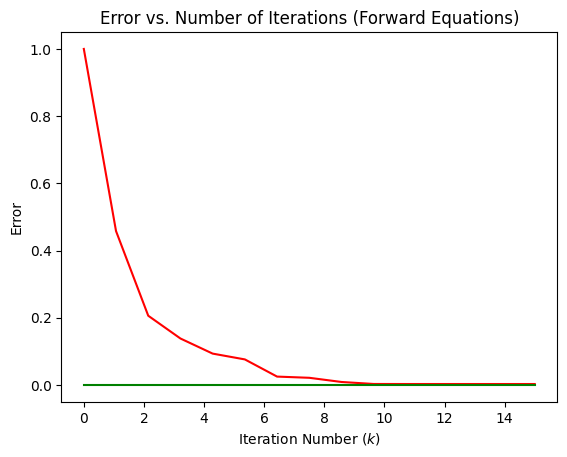

In [5]:
deltas = forward_algorithm(A_coefs,B_coefs,C_coefs,X_guesses, X_true_vals, 3, 10e-12, 500)

plot_error(deltas)

#Solving the Backwards Sylvester Equations Using an Iterative Scheme

##Intialize the Problem (Using the Forward/Backward Equivalency of the PSME Equations)

In [6]:
B_0 = np.array([[2.7,0.9],
                [-1.1,2.3]]).T

B_1 = np.array([[4.2,1.3],
                [-1.9,3.8]]).T

B_2 = np.array([[6.1,3.8],
                [-3.1,6.3]]).T

A_0 = np.array([[1.5,-0.2],
                [0.4,1]]).T

A_1 = np.array([[2.1,-0.4],
                [0.4,2]]).T

A_2 = np.array([[3.1,-0.6],
                [0.7,3.5]]).T

C_0 = np.array([[13.2,10.6],
                [0.6,8.4]]).T

C_1 = np.array([[26.3,21.2],
                [1.2,16.8]]).T

C_2 = np.array([[38.6,32.1],
                [1.6,24.2]]).T


A_coefs = [A_0,A_1,A_2]

B_coefs = [B_0,B_1,B_2]

C_coefs = [C_0,C_1,C_2]

##True Solutions and Guesses for each $X_j$

In [7]:
X_0_true = np.array([[2.2793996,2.1443471],
                     [-0.0051931702, 2.8579759]]).T

X_1_true = np.array([[3.8959223, 3.0173185],
                     [0.91464058, 4.3687107]]).T

X_2_true = np.array([[3.7974097, 2.1833681],
                     [1.8075207, 3.3273581]]).T

X_true_vals = [X_0_true, X_1_true, X_2_true]

X_0_init = 10**(-16)*np.ones((2,2))

X_1_init = 10**(-16)*np.ones((2,2))

X_2_init = 10**(-16)*np.ones((2,2))

X_guesses = [X_0_init, X_1_init,X_2_init]

##Solve the Backwards Equations

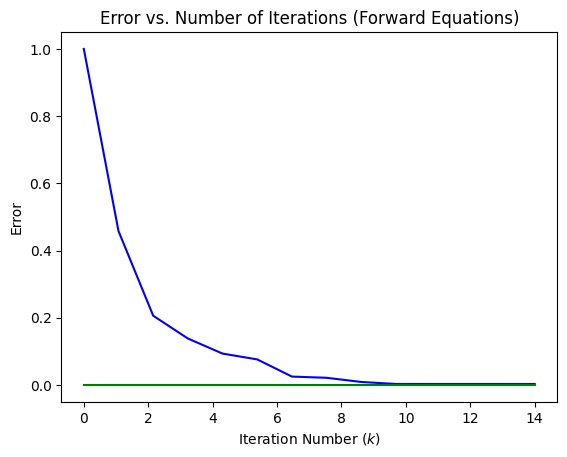

In [8]:
deltas_2 = backward_algorithm(A_coefs,B_coefs,C_coefs,X_guesses, X_true_vals, 3, 10e-12, 500)

plot_error_b(deltas_2)

#Custom Example

Now, we will create a custom example with $2\times 2$ matrices. Since we don't have the solution to the problem, we will plot the results by examining the convergence of each element for each $X_j$. We will solve the forward periodic Sylvester Equation for this example and we don't need to examine the backwards equation since we have shown numerically (and analytically in the report) that the two are really the same:

##Initialize the Forward Problem

For the initialization, we will randomize the initial $X_j$ guesses instead of starting them all at zero so we can observe that our algorithm is consistent.

In [9]:
A_0 = np.array([[1.3,0.4],
                [-0.4,4.5]])

A_1 = np.array([[5.2,2.1],
                [-2,5.6]])

A_2 = np.array([[6.8,4.1],
                [-2.9,7.3]])

B_0 = np.array([[0.8,-0.1],
                [0.7,1.7]])

B_1 = np.array([[2.5,-0.9],
                [1,2.4]])

B_2 = np.array([[3.6,-0.2],
                [0.9,3.7]])

C_0 = np.array([[15.7,14.2],
                [0.3,5.7]])

C_1 = np.array([[34.2,23.6],
                [1.7,16.7]])

C_2 = np.array([[32.4,28.3],
                [2.1,19.9]])


A_coefs = [A_0,A_1,A_2]

B_coefs = [B_0,B_1,B_2]

C_coefs = [C_0,C_1,C_2]

X_0_init = 3*np.random.rand(2,2)

X_1_init = 3*np.random.rand(2,2)

X_2_init = 3*np.random.rand(2,2)

X_guesses = [X_0_init, X_1_init,X_2_init]